# Практическая работа №2: Статистический анализ социальных сетей.
Выполнил студент гр. 0383 Пенкин Михаил. Вариант №59

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними.

**Различные виды диад:**
- Взамная диада - $D_{ij}=(1, 1)$
- Асимметричная диада - $D_{ij}=(0, 1)$ или $D_{ij}=(1, 0)$
- Нулевая диада - $D_{ij}=(0, 0)$

**Цензус диад** - тройка чисел $(M, A, N)$, где
- $M = \sum_{i<j}X_{ij}X_{ji}$ - число взаимных диад
- $A = X_{++}-2M$ - число асимметричных диад
- $N = (_2^g)-A-M$ - число нулевых диад

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе к взаимному выбору друг друга. $(-\infty < \rho_{KP} \le 1)$

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества взаимных диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$ 

где $M_{\min} = \max f(t), 0 \le t \le g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} X_{i+} - \max g(t)\rfloor, 0 \le t \le g,$

$f(t) = \sum^t_{i=1} X_{i+} - t(g - 1) - (^t_2),$

$g(t) = \sum^t_{i=1} X_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, X_{i+}).$

**Вычисление доверительного интервала для оценки параметра P**:

Оценка P: $\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \le P \le \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\Phi(z_{\alpha/2}) = 0.5 - \frac{\alpha}2$, где $\alpha - $ уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

№1. Вариант 59: 76, 0.63, 0.69, 0.01.
С помощью библиотеки igraph был смоделирован случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами. 
Описание модели:
В графе $\mathcal{G} (g, p)$ имеется 𝑔 вершин, и для каждого ребра вероятность того, что оно присутствует в графе, будет равна 𝑝.

In [32]:
library(igraph)
library(statnet)

g <- 76
p <- 0.63
p0 <- 0.69
alpha <- 0.01
graph <- erdos.renyi.game(g, p, directed = T)
net <- network(as_adjacency_matrix(graph), directed = T)

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



№2. Полученный орграф был отображен.

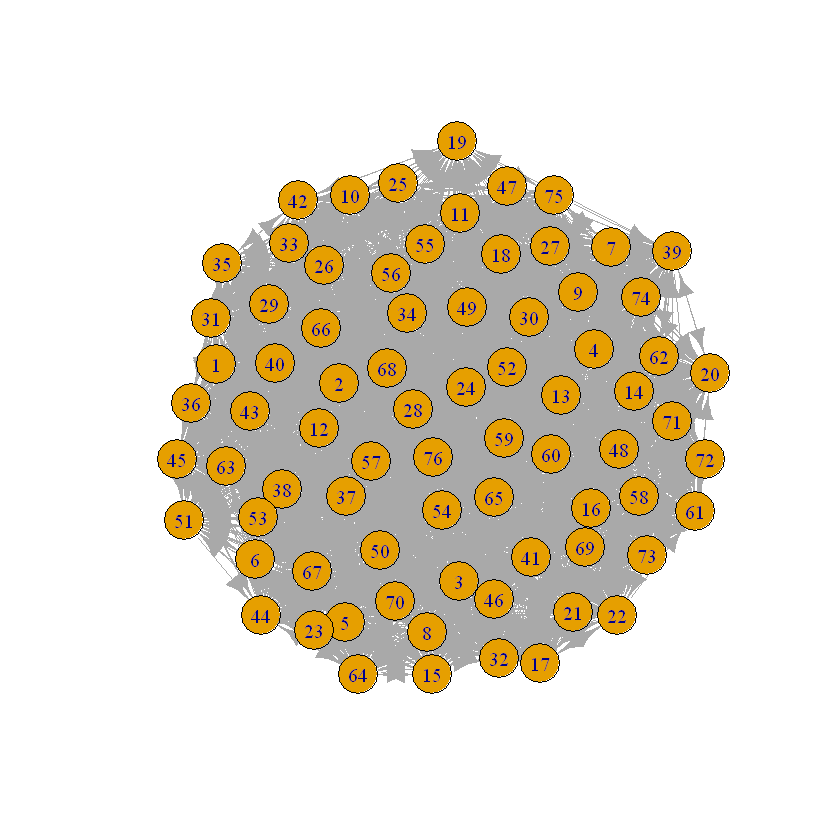

In [33]:
plot(graph, layout=layout_with_fr(graph))

№3. Была вычислена «пятичисловая сводка» графа.

In [34]:
cat("Размер: ", gorder(graph), "\n")
cat("Плотность: ", edge_density(graph), "\n")
cat("Число компонент: ", igraph::components(graph)$no, "\n")
cat("Диаметр: ", diameter(graph), "\n")
cat("Коэффициент кластеризации: ", transitivity(graph), "\n")

Размер:  76 
Плотность:  0.6201754 
Число компонент:  1 
Диаметр:  2 
Коэффициент кластеризации:  0.8557676 


№4. Был вычислен цензус диад.
Вывод: число взаимных диад $M$ = 1136,ч исло ассиметричных диад $A$ = 1329, число пар акторов $N$, между которыми нет связи, = 385.

In [14]:
census <- dyad_census(graph)
census

$mut
[1] 1136

$asym
[1] 1329

$null
[1] 385

№5. Была вычислена оценка индекса взаимности Каца-Пауэла при фиксированом выборе акторов $d = 35$ 
Вывод: можем увидеть, что при фиксированном выборе акторы больше склоняются к образованию взаимных диад, но не так сильно при свободном выборе.

In [37]:
M <- census$mut
d <- 35
fix <- (2*(g-1)*M-g*d^2)/(g*d*(g-1-d))

x <- as_adj(graph, sparse=F)
L <- sum(rowSums(x))
L2 <- sum(rowSums(x)^2)
free <- (2*(g-1)^2*M-L^2+L2)/(L*(g-1)^2-L^2+L2)

cat("Оценка при фиксированном выборе d = 35:", fix, "\n")
cat("Оценка при свободном выборе:", free, "\n")

Оценка при фиксированном выборе d = 35: 0.7265038 
Оценка при свободном выборе: 0.05948546 


№6. Была вычислена вероятноcть того, что связь будет взаимной для каждого случая. 

In [40]:
p_fix <- (d/(g-1))*((d/(g-1))+fix*(g-1-d)/(g-1))
p_free <- (rowSums(adj_matrix)*colSums(adj_matrix))/(g - 1)^2
cat('Вероятность для фиксированного выбора', p_fix, '\n')
cat('Вероятность для свободного выбора: min = ', min(p_free), ', max = ', max(p_free), ', avg = ', mean(p_free), '\n', sep='')

Вероятность для фиксированного выбора 0.3985965 
Вероятность для свободного выбора: min = 0.2696889, max = 0.5258667, avg = 0.3988982


№7.

ERROR: Error in eval(expr, envir, enclos): объект 'g_res' не найден


№8. Была проверена гипотеза $H_0: L ∼ Bin(g(g − 1), 1/2)$ при уровне значимости $\alpha=0.05$.
Вывод: максимальный уровень значимости при котором нулевая гипотеза не отвергается очень мал (< 2.2e-16). Уровень значимости $\alpha=0.01$ ниже $p=0.6201754$.

In [43]:
binom.test(sum(x), g*(g-1), p = 0.5)


	Exact binomial test

data:  sum(x) and g * (g - 1)
number of successes = 3535, number of trials = 5700, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6074291 0.6327986
sample estimates:
probability of success 
             0.6201754 


№9. Была проверена гипотеза $H_0: L ∼ Bin(g(g − 1), P_0)$ при уровне значимости $\alpha=0.01$.

In [44]:
binom.test(sum(x), g*(g-1), p = 0.6201754)


	Exact binomial test

data:  sum(x) and g * (g - 1)
number of successes = 3535, number of trials = 5700, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.6201754
95 percent confidence interval:
 0.6074291 0.6327986
sample estimates:
probability of success 
             0.6201754 


№10. Был построен доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью $(1 − \alpha) = 0.99$.отвергнутым гипотезам с $p=0.5$ и $p=0.69$.

## Выводы

В ходе выполнения данной практической работы были получены практичесие навыки работы с математическими пакетами для статистического анализа социальных сетей. Научились определять тенденцию создания парных связей в диадах графа через вычисление цензуса диад и подсчёта с помощью него индексов взаимности Каца-Пауэла и Бандиопадхьяйя, а также определять вероятность появления рёбер и число рёбер через проверку гипотез о принадлежности числа рёбер в графе биномиальному распределению.